In [76]:
import numpy as np
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'
from pandas import DataFrame, Series

# Numpy私房手册 

## 创建Numpy数组

### 从Python列表创建数组 

NumPy 要求数组必须包含同一类型的数据。 如果类型不匹配， NumPy 将会向上转换（如果可行）。

In [5]:
np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

特别需要注意的是，nan也是一种浮点数，所以当数组中有nan的时候（`np.nan`,`np.NAN`,`np.NaN`都是一样的），会转换成浮点数,：

In [42]:
a = np.array([1, 2, np.nan])
a.dtype
a

dtype('float64')

array([ 1.,  2., nan])

Numpy不一定非要接受列表，也可以接收一个迭代器。

In [7]:
np.array([range(i, i+3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

### 从头创建数组 

常用的函数有`np.zeros`,`np.ones`,`np.full`,`np.linspace`,`np.random.random`,`np.random.normal`,`np.eye`,`np.empty`等，几个容易混淆或用的较少的如下：
`np.random.random(size=None)`：\[0, 1)之间均匀分布的随机数  
`np.random.normal(loc=0, scale=1.0, size=None)`： 均值为0，方差为1正态分布的随机数  
`np.random.randint(low, high=None, size=None, dtype='l')`： \[low, high)区间的随机整型

In [13]:
np.full((3, 2), 3.14)

array([[3.14, 3.14],
       [3.14, 3.14],
       [3.14, 3.14]])

注意：np.empty获得的数组里面的值不是都为空，而是内存空间中的任意值：

In [17]:
np.empty((3, 2))

array([[3.14, 3.14],
       [3.14, 3.14],
       [3.14, 3.14]])

有个小技巧以上几个创建数组的函数都有对应的like函数（`np.empty_like`,`np.full_lie`,`np.ones_like`,`np.zeros_like`）来根据已有数组的形状快速创建，如：

In [222]:
a = np.random.random((4, 3))
a
b = np.ones_like(a)
b

array([[0.59747151, 0.41828002, 0.99601997],
       [0.06556234, 0.29289095, 0.00621939],
       [0.00111011, 0.56541545, 0.484893  ],
       [0.38749498, 0.20917464, 0.02674715]])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## Numpy数组的基本属性和数据类型

### 数组基础结构

numpy的所有数组对象都是数据块的跨度视图，这也是numpy的速度快的原因，内部由以下内容构成：
- 一个指向数组的指针
- 数据类型（dtype）
- 一个表示数组形状的元组
- 一个跨度元组，其中的整数指的是为了前进到当前纬度下一个元素需要“跨过”的字节数，比如一个C顺序的（3，4，5）的float64（8字节）数组，跨度为（160，40，8）
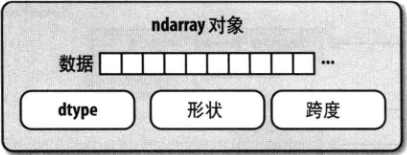

另外，由于数据在内存中是连续存储的，因此存在是以行优先还是列优先来存储，由于历史原因，行优先被称作C（C语言）序，列优先被称为F（Fortran）序，在很多数组方法中，可以用过参数order来指定行优先还是列优先（默认为C序行优先），如：

In [58]:
a = np.arange(9).reshape(3, 3)
a
a.ravel('C')
a.ravel('F')

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

array([0, 3, 6, 1, 4, 7, 2, 5, 8])

按道理来说，对行进行计算，行优先会更快，对列进行计算，列优先会更快，但是不知道为什么，在目前的版本(1.15.4)下，结果相差不大，而且正好相反，如下：

In [50]:
arr_c = np.ones((1000, 1000), order='C')
arr_f = np.ones((1000, 1000), order='F')

In [51]:
%timeit arr_c.sum(1)

1.26 ms ± 25.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [52]:
%timeit arr_f.sum(1)

1.02 ms ± 8.47 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [55]:
%timeit arr_c.sum(0)

1.04 ms ± 21.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [56]:
%timeit arr_f.sum(0)

1.26 ms ± 23.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


需要注意的是，切片返回的视图并不一定是连续的：

In [94]:
a = np.arange(16).reshape(4, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [95]:
a[:2, 2:].flags.contiguous

False

In [96]:
a[:2, 2:].flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

### 数组基本属性 

几个比较重要的属性：ndim（维度）,shape（形状）,size（大小）,dtype（类型），itemsize（元素字节大小），nbytes（总字节大小），flags（一些标识，注意C_CONTIGUOUS和F_CONTIGUOUS，表明数组是行优先还是列优先）,strides（跨度）

In [22]:
a = np.random.randint(0, 10, (5, 3))
d = {
    'ndim': a.ndim,
    'shape': a.shape,
    'dtype': a.dtype,
    'itemsize': a.itemsize,
    'nbytes': a.nbytes,
    'strides': a.strides,
    'flags': ''
}
fmt = ("{:<10s}={:>10s}\n" * 7).strip()
print(
    fmt.format(
        *np.array(list(zip(d.keys(), [str(val)
                                      for val in d.values()]))).ravel()))
print(a.flags)

ndim      =         2
shape     =    (5, 3)
dtype     =     int32
itemsize  =         4
nbytes    =        60
strides   =   (12, 4)
flags     =          
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


### 数组的数据类型

由于数组在内存中是连续存储的，因此必须要指定数组的固定格式（意味着一开始就要告诉计算机数组中的一个元素有多大，占多少字节）。numpy数组通过dtype参数指定格式，其可以是np的各种dtype类型，python中的类型，或者字符串形式（字符串可以简写，其中'<','>'代表高位还是低位存储，字母代表类型，数字代表字节数），numpy的dtype类型和C语言是对应的，[点击这里查看](https://www.numpy.org/devdocs/user/basics.types.html)：

In [73]:
np.arange(10, dtype=np.float32)
np.arange(10, dtype=float) # 默认为float64
np.arange(10, dtype='f4')

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)

有时候需要判断数组的类型，可以使用`np.issubdtype`函数进行判断，不同类型的dtype都有一个超类，可以通过某个dtype子类的mro属性查看，如：

In [82]:
np.float32.mro()

[numpy.float32,
 numpy.floating,
 numpy.inexact,
 numpy.number,
 numpy.generic,
 object]

In [83]:
np.issubdtype(a.dtype, np.floating)

True

最后补充一张dtype类的继承体系，此图来自《用python进行数据分析》，版本有点老，新版本略有不同：
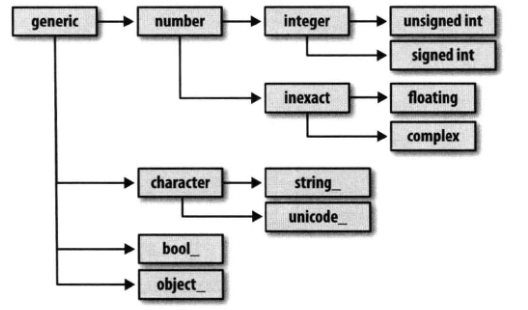

### 数组类型转换

可以通过数组的`astype`方法进行显示的转换，但是要注意的是，此时总是返回原数组的一个副本，哪怕新老dtype相同也是一样：

In [99]:
a = np.array([1, 2, 3, 4, 5], dtype=np.integer)
a.dtype
b = a.astype(np.floating)
a.dtype
b.dtype

dtype('int32')

dtype('int32')

dtype('float64')

## 获取Numpy数组的子集 

### 普通索引

注意：Python 列表不同，NumPy 数组是固定类型的。将一个浮点值插入一个整型数组时，浮点值会被截短成整型，注意并不是四舍五入，而是直接截断。并且这种截短是自动完成的，不会有任何提示或警告。

In [106]:
x = np.array([5, 3, 3, 0, 7, 9])
x[0] = 3.56
x

array([3, 3, 3, 0, 7, 9])

### 数组切片

1. 在 Python 列表中，切片是值的副本，而Numpy数组的切片，返回的是数组的视图。这意味着，如果更改视图，原数组也会改变。如何想要复制，可以用copy函数实现。

In [116]:
a = np.linspace(0, 10, 6)
a

array([ 0.,  2.,  4.,  6.,  8., 10.])

In [117]:
# 对a进行切片，并复制给变量b
b = a[:3]
b

array([0., 2., 4.])

In [118]:
# 更改b，此时a也发现变化
b[0] = 4
b
a

array([4., 2., 4.])

array([ 4.,  2.,  4.,  6.,  8., 10.])

2. 如果切片返回的视图进行运算，此时参与计算的是副本，不会改变原始数组：

In [212]:
a = np.linspace(0, 10, 6)
a
a[:3] + 1
a

array([ 0.,  2.,  4.,  6.,  8., 10.])

array([1., 3., 5.])

array([ 0.,  2.,  4.,  6.,  8., 10.])

### 布尔索引 

1. 常见的用法是通过数组的比较运算方便的产生布尔数组，然后将此布尔数组作为掩码进行索引。但是要注意的是，二维数组使用一维的布尔掩码，返回的是布尔索引为True的对应的行或列构成的二维数组，此时numpy和pandas是一致的，但如果使用二维的布尔掩码，则返回一个满足条件（元素对应位置为True）的一维数组，这一点是和pandas的DataFrame是不同的，pandas仍然返回二维数组，但对应位置为False的元素会被设置为NaN：

In [140]:
bool_idx = np.array([1, 0, 1], dtype=bool)
a = np.arange(9).reshape(3, 3)
a
a[bool_idx]
a[:, bool_idx]
df = DataFrame(a)
df[bool_idx]
df.iloc[:, bool_idx]

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([[0, 1, 2],
       [6, 7, 8]])

array([[0, 2],
       [3, 5],
       [6, 8]])

,0,1,2
0,0,1,2
2,6,7,8


,0,2
0,0,2
1,3,5
2,6,8


In [141]:
a[a<4]
df[df<4]

array([0, 1, 2, 3])

,0,1,2
0,0.0,1.0,2.0
1,3.0,NaN,NaN
2,NaN,NaN,NaN


2. 关键字 and 和 or， 以及逻辑操作运算符 & 和 | 的区别：and 和 or 判断整个对象是真或假，而 & 和 | 是指每个对象中的比特位。因此，当数组进行比较的时候使用关键字，Python会计算整个数组对象的真或假，从而导致程序出错。  
3. 逻辑操作运算符的优先级别比比较运算符要高，因此复合表达式中注意通过括号进行正确的运算。

In [153]:
a = np.arange(10)
(a < 3) & (a > 7)

array([False, False, False, False, False, False, False, False, False,
       False])

4. 最后要记住重要的一点是：不同与切片，布尔索引返回的是数组的副本。

### 花式索引 

花式索引有4点比较重要：

1. 行、列花式索引进行配对来最终确定被索引的值，如下面的例子，此时选中的是行索引和列索引配对的结果(1, 1)，(2, 3)：

In [157]:
a = np.arange(16).reshape(4, 4)
a
a[[1, 2], [1, 3]]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

array([ 5, 11])

2. 索引值的配对满足广播的原则（广播原则见6.2），即当行和列的花式索引形状不同时，先广播，然后再配对。
3. 花式索引最后返回的数组的形状是和广播后的索引的形状是一致的，而不是和被索引的数组形状一样。  

看下面的例子：

In [211]:
a = np.arange(16)[np.newaxis, :]
row = np.array([0, 0, 0]).reshape(3, -1)
col = np.array([3, 2, 1])
row
col
a[row, col]

array([[0],
       [0],
       [0]])

array([3, 2, 1])

array([[3, 2, 1],
       [3, 2, 1],
       [3, 2, 1]])

row索引的形状是(3, 1)，列索引的形状是(3,)，形状不同，此时通过广播变换成相同的形状，然后再进行点对点的配对。经过广播后，row索引应该是这样：

In [197]:
row.repeat(3, axis=1) # 或者np.tile(row, 4)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

col索引应该是这样：

In [198]:
col[np.newaxis, :].repeat(3, axis=0) # 或者np.tile(col[np.newaxis, :], (4, 1))

array([[3, 2, 1],
       [3, 2, 1],
       [3, 2, 1]])

4. 最后一点，花式索引返回的也是数组的副本。

还有几点需要提及：  
行、列使用布尔索引得到的结果和花式索引是类似的，如下：

In [227]:
a = np.arange(16).reshape(4, 4)
row_bool = np.array([0, 1, 1, 1], dtype=bool)
col_bool = np.array([0, 1, 1, 1], dtype=bool)
a
a[row_bool, col_bool]
a[[1, 2, 3], [1, 2, 3]]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

array([ 5, 10, 15])

array([ 5, 10, 15])

这可能并不是想要的结果，更多的时候是希望直接选取方形矩阵，有3种方法可以实现：

In [229]:
# 利用切片
a[1:, 1:]

# 利用花式索引
a[[1, 2, 3]][:, [1, 2, 3]]

# 或者利用np.ix_创建一个选取方形区域的索引器
a[np.ix_([1, 2, 3], [1, 2, 3])]

array([[ 5,  6,  7],
       [ 9, 10, 11],
       [13, 14, 15]])

array([[ 5,  6,  7],
       [ 9, 10, 11],
       [13, 14, 15]])

array([[ 5,  6,  7],
       [ 9, 10, 11],
       [13, 14, 15]])

### 组合索引 

可以将普通索引、切片、布尔索引和花式索引组合起来使用，但是有以下几点需要注意：

1. 组合索引返回的全部都是数组的副本。
2. 切片、布尔索引和花式索引组合得到的结果是不同的，切片+花式返回方形区域，布尔+花式返回类似配对的结果。

In [23]:
a = np.arange(16).reshape(4, 4)
a
a[0:2, [2, 3]]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

array([[2, 3],
       [6, 7]])

In [26]:
a
a[np.array([1, 1, 0, 0], dtype=bool), [2, 3]]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

array([2, 7])

此时可以这样理解，将布尔索引过滤后的行或者列转换成花式索引的列表，上例中通过布尔索引`np.array([1, 1, 0, 0], dtype=bool)`过滤后的行转换成花式索引就是\[0, 1\],接下来就按照花式索引的规则先广播，后配对。  
如果将布尔索引更换成`np.array([1, 1, 1, 0], dtype=bool)`，则会出现以下的错误信息：
> shape mismatch: indexing arrays could not be broadcast together with shapes (3,) (2,)

说明背后的广播机制在发挥作用。

最后，注意numpy和pandas中，布尔+花式的组合索引的表现是不同的，numpy返回点配对的结果（一维数组），pandas直接返回方形区域，可以这样理解，因为pandas需要保留索引的信息，所以返回方形区域更合理，如下：

In [22]:
a = np.arange(12).reshape(4, 3)
d = DataFrame(a)
d
d.loc[d.loc[:, 0] < 6, [1, 2]]
a[a[:, 0] < 6, [1, 2]]

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


,1,2
0,1,2
1,4,5


array([1, 5])

### 直接对索引进行赋值

不管是哪一种索引，如果直接进行赋值的话，改变的是原始的数组，注意这和视图、副本概念的区别。将索引返回的数组赋值给一个变量，这个赋值的操作才会产生副本或者视图，赋值之前的操作都是作用在原数组上。

In [8]:
a = np.arange(16).reshape(4, 4)
a[a>4] = 8
a
a[[0, 1], [1, 2]] = 10
a

array([[0, 1, 2, 3],
       [4, 8, 8, 8],
       [8, 8, 8, 8],
       [8, 8, 8, 8]])

array([[ 0, 10,  2,  3],
       [ 4,  8, 10,  8],
       [ 8,  8,  8,  8],
       [ 8,  8,  8,  8]])

## Numpy数组的常见变换

### 数组的重塑

1. 可以利用reshape函数可以重塑成任意的形状，需要注意的是-1代表根据实际数量自动调整：

In [3]:
np.arange(1, 17).reshape(4, -1)

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

2. 除了利用reshape函数，还可以在一个切片操作中利用`np.newaxis`关键字：

In [119]:
# 一维数组
a = np.array([1, 2, 3])
# 变形为二维数组的行向量
a[np.newaxis, :]
# 变形为二维数组的列向量
a[:, np.newaxis]

array([[1, 2, 3]])

array([[1],
       [2],
       [3]])

3. 转置和轴变换是重塑的一种特殊形式，常用的有`T`转置快捷方式，`np.transpose`和`np.swapaxes`方法。  
低维的转置和轴变换很简单，大于3维就很烧脑，这里也没有想出什么好的理解方法，如果有人能理解透彻，还希望能赐教，举个例子：

In [31]:
a = np.random.randint(1, 17, (2, 2, 4))
a
np.transpose(a, axes=(1, 0, 2))
np.swapaxes(a, 0, 1)

array([[[ 7, 13,  5,  7],
        [14,  7,  5, 11]],

       [[16, 15, 16, 13],
        [16, 16,  5, 14]]])

array([[[ 7, 13,  5,  7],
        [16, 15, 16, 13]],

       [[14,  7,  5, 11],
        [16, 16,  5, 14]]])

array([[[ 7, 13,  5,  7],
        [16, 15, 16, 13]],

       [[14,  7,  5, 11],
        [16, 16,  5, 14]]])

### 数组扁平化

重塑可以将数组从低维转换为高维，扁平化正好相反，可以将数组从高维转换为低维，常用的2个函数是`np.flatten`和`np.ravel`，它们的区别是`np.flatten`返回副本，`np.ravel`返回视图，另外需要注意的一点就是扁平化的时候可以指定是按照C序还是F序：

In [226]:
a = np.random.randint(1, 10, (3, 3))
a
a.flatten(order='C')
a.flatten(order='F')

array([[1, 3, 5],
       [3, 2, 7],
       [7, 5, 9]])

array([1, 3, 5, 3, 2, 7, 7, 5, 9])

array([1, 3, 7, 3, 2, 5, 5, 7, 9])

### 数组的拼接和分裂

常用的拼接函数有：`np.concatenate`,`np.vstack`,`np.hstack`,`np.dstack`，`np.r_`，`np.c_`,其中dstack是指沿着第3个轴拼接。  
常用的分裂函数有：`np.split`,`np.vsplit`,`np.hsplit`,`np.dsplit`。

需要注意的是：
1. n个分裂点得到n+1个子数组，高维数组可以通过axis参数指定分裂的轴向。

In [9]:
a = np.arange(1, 17).reshape(4, 4)
a
np.split(a, (1, 3))

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

[array([[1, 2, 3, 4]]), array([[ 5,  6,  7,  8],
        [ 9, 10, 11, 12]]), array([[13, 14, 15, 16]])]

2. 值得一提的是`np.r_`，`np.c_`是concatenate的快捷方式，不仅是简单的拼接，还可以将切片翻译成数组，传入字符串指示数组重塑，查看官方文档，对'0,2,1'这种类型3个数字的指示字符串仍然不太理解，不过这种方式均有其它方法代替而且效率不高。

In [122]:
a = np.arange(1, 10)
np.split(a, [2, 5])

[array([1, 2]), array([3, 4, 5]), array([6, 7, 8, 9])]

### 数组的重复

主要使用的是`np.repeat`和`np.tile`两个函数，repeat针对元素进行重复，tile和它的名字一样，像贴瓷砖一样重复。但还是有几点需要注意：

1. `np.repeat`如果不指定轴向，数组会被扁平化。

In [86]:
a = np.arange(1, 10).reshape(3, 3)
a
a.repeat(2)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

array([1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9])

2. `np.tile`不可以指定轴向，默认是水平铺设，只能通过向第二个参数传递重复次数进行控制。

In [89]:
np.tile(a, (2, 1))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

## 数组的排序

### 普通排序注意事项

numpy的排序主要也是依靠数组的`sort`方法以及顶级的`sort`函数，和python相似，`sort`方法就地排序，`np.sort`函数返回新数组，但还是有几点需要注意：

1. 这两种方法都接受axis参数，可以指定轴向进行排序，默认-1，即最后的轴，需要注意的是当指定轴排序时，处理方式是将行或列当作独立的数组， 任何行或列的值之间的关系将会丢失。
2. 两种方法都不能设置为降序，但是可以使用切片的小技巧达到目的，如下：

In [110]:
a = np.random.randint(1, 17, (4, 4))
a
a.sort(axis=0)
a[::-1, ::] # 返回降序排序的视图

array([[ 2,  3,  5, 13],
       [ 5, 16,  3,  3],
       [ 5,  7, 15,  6],
       [ 2,  5, 15,  7]])

array([[ 5, 16, 15, 13],
       [ 5,  7, 15,  7],
       [ 2,  5,  5,  6],
       [ 2,  3,  3,  3]])

3. 方法中还有个kind参数，可以选择排序算法，有3种算法可以选择：'quicksort（快速排序）'，'mergesort（合并排序）'，'heapsort（堆排序）'，'stable（稳定排序）'，其中stable关键字是1.15版本加入的，mergesort和stable本质都是timsort算法，保留mergesort关键字只是为了向后兼容。每种排序的性能指标如下：
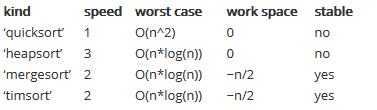

默认是quicksort算法，虽然最坏情况下quicksort的算法复杂度看起来最慢，但是大多数情况下quicksort的速度是最快的，速度快慢和数据规模有很大关系。顺便提一句，python用的就是快速排序。

关于稳定性需要特别说明：  
所谓稳定性，就是在排序的时候会保持相同元素的相对位置，直接说不好理解，还是看例子：

In [179]:
# 现在想根据字符串开头的数字进行排序，但是不能改变名词的顺序
arr = np.array(['2:banana', '2:apple', '1:dog', '1:cat', '1:rabbit'])
# 直接对字符串排序改变了名词的顺序
np.sort(arr)

array(['1:cat', '1:dog', '1:rabbit', '2:apple', '2:banana'], dtype='<U8')

In [181]:
key = np.array([2, 2, 1, 1, 1])
indexer = key.argsort(kind='stable')
arr[indexer]

array(['1:dog', '1:cat', '1:rabbit', '2:banana', '2:apple'], dtype='<U8')

如果使用其它算法运行上面的例子，可能会得到和stable算法相同的结果，这可能会让你产生疑问，主要是上面的例子中，数据太少。当数据多一点的时候，其它算法是不能保持原始的顺序的，如下：

In [198]:
key = np.array([2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
quicksort_idx = key.argsort(kind='quicksort')
print("quicksort:")
print(quicksort_idx)
stable_idx = key.argsort(kind='stable')
print("stable:")
print(stable_idx)
heap_idx = key.argsort(kind='heapsort')
print("heapsort:")
print(heap_idx)

quicksort:
[ 8 15 14 13 12 11 10  9 17  7  6  5  4  3  2 16  1  0]
stable:
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17  0  1]
heapsort:
[17  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16  1  0]


### 间接排序

间接排序上面的例子已经应用到，即返回的不是数组而是排好序的索引，然后再通过序号来获得最终排好序的数组。主要用到的函数是`np.argsort`以及`np.lexsort`，两者差不多，只不过lexsort可以一次性传入多个数组，然后返回索引。  
需要注意的是，lexsort排序是从后向前，从最后传入的数组开始排序的：

In [216]:
# 假设有如下的二维数组，现在想根据第1列和第2列的值对数组进行排序
a = np.array([[2, 2, 3, 4], [1, 2, 3, 5], [2, 1, 4, 7], [1, 5, 9, 8]])
a
idx = np.lexsort((a[:, 0], a[:, 1])) # 第1列后传入，因此以先第1列，然后第0列进行排序
idx
a[idx, :]
idx = np.lexsort((a[:, 1], a[:, 0])) # 第0列后传入，因此以先第0列，然后第1列进行排序
idx
a[idx, :]

array([[2, 2, 3, 4],
       [1, 2, 3, 5],
       [2, 1, 4, 7],
       [1, 5, 9, 8]])

array([2, 1, 0, 3], dtype=int64)

array([[2, 1, 4, 7],
       [1, 2, 3, 5],
       [2, 2, 3, 4],
       [1, 5, 9, 8]])

array([1, 3, 2, 0], dtype=int64)

array([[1, 2, 3, 5],
       [1, 5, 9, 8],
       [2, 1, 4, 7],
       [2, 2, 3, 4]])

### 部分排序

比如你想要看一个数组第k小的数，可以利用`np.partition`函数，它会找到这个数组中第k小的数，然后把它放在数组的第k个位置上，这个数左边的数都比它小，右边的数都大于等于它，就像是把数组分隔开一样。  
要注意2点：
1. 多维数组可以指定要分隔的轴，但是默认是最后一个轴。
2. 第k小两边的数字是乱序的。
3. k是从0开始计数的，第k小意味着数组中第k+1个数。
4. 同普通排序一样，也有一个argpartition函数返回排序后的索引。

看下面的列子，因为是二维数组，默认对axis=1，也就是针对行进行分隔，(4, 8)表示想要找到数组a中第4小和第8小的数字，第4小的数字（第5个数）分别是19、21，第8小（第9个数）分别是29和30。

In [34]:
np.random.seed(42)
a = np.random.randint(1, 42, (2, 12))
a
np.partition(a, (4, 8))
np.argpartition(a, (4, 8))

array([[39, 29, 15,  8, 21, 39, 19, 23, 11, 11, 24, 36],
       [40, 24,  3, 22,  2, 24, 30, 38,  2, 21, 33, 12]])

array([[ 8, 11, 11, 15, 19, 21, 23, 24, 29, 36, 39, 39],
       [ 2,  2,  3, 12, 21, 22, 24, 24, 30, 38, 33, 40]])

array([[ 3,  8,  9,  2,  6,  4,  7, 10,  1, 11,  0,  5],
       [ 4,  8,  2, 11,  9,  3,  5,  1,  6,  7, 10,  0]], dtype=int64)

### 数据区间划分

`np.searchsorted`顶层函数或者数组的`searchsorted`方法都可以在一个有序的数组中，利用二分法快速的查找元素，python内置库也有类似的bisect包。  
需要注意的几点：
1. 默认返回相等值左侧的位置，可以通过`side`参数指定左侧还是右侧，注意只有存在相等的值的时候`side`参数才起作用。
2. 必须是有序且是升序的数组，如果是无序的，可以传入一个`sorter`参数指定a的顺序，`sorter`一般是一个`argsort`方法返回的数组。
3. 注意先传入有序数组，再传入要查找的数组，因此用于数据分段的时候，先传入用于分隔的bins，再传入数据data。

In [15]:
bins = np.arange(0, 100, 10)
# 这里shuffle存粹是为了返回idx, 用来演示sorter的作用
np.random.shuffle(bins)
bins
idx = np.argsort(bins)
data = [10, 15, 24]
data
np.searchsorted(bins, data, sorter=idx, side='right') # 10在数组中索引为1，返回右侧的位置为2
np.searchsorted(bins, data, sorter=idx, side='left') # 返回左侧的位置为1

array([50, 90, 70, 40, 60, 30, 20,  0, 10, 80])

[10, 15, 24]

array([2, 2, 3], dtype=int64)

array([1, 2, 3], dtype=int64)

np中还有一个顶层函数`np.digitize`也有类似的作用，传入的数组bins不光可以是升序，还可以是降序，不过需要注意以下几点：
1. 升序降序对应的左侧右侧不一样，需要格外小心。对应关系如下：
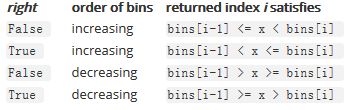
2. 参数顺序和`np.searchsorted`正好相反，先传入要查找的数据，再传入分隔数组bins。

还是上面的例子，使用`digitize`应该是这样（此时是升序，如果要和`searchsorted`表现一样，需要满足`bins[i-1] < x <= bins[i]`，此时right为True）：  
可以这么记忆，如果遇到相同的值，`searchsorted`的side参数是指往相同值（bins里的数值）的左侧还是右侧插入值，升序的情况下，`digitize`的`right`参数是指相同值（bins里的数值）是在要插入的值的左边还是右边，右边则为True，左边则为False，降序则相反。

In [17]:
bins.sort()
bins
data
# 注意传入参数的顺序，searchsorted传入参数的顺序是(bins, data)，而digitze的顺序是(data, bins)
np.digitize(data, bins, right=True)
np.digitize(data, bins, right=False)

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

[10, 15, 24]

array([1, 2, 3], dtype=int64)

array([2, 2, 3], dtype=int64)

这里举一个常见的应用例子，即结合pandas的groupby，快速的统计不同分数段学生的平均成绩，例子很简单，主要目的是通过传递不同的right参数或者side参数，熟悉不同参数的面元划分的区别：

In [97]:
score = np.array([50, 50, 60, 60, 80, 80, 100])
bins = [60, 80]
label_d = np.digitize(score, bins, right=False)
label_d
label_s = np.searchsorted(bins, score, side='left')
label_s

array([0, 0, 1, 1, 2, 2, 2], dtype=int64)

array([0, 0, 0, 0, 1, 1, 2], dtype=int64)

In [101]:
Series(score).groupby(label_d).mean()
Series(score).groupby(label_s).mean()

0    50.000000
1    60.000000
2    86.666667
dtype: float64

0     55
1     80
2    100
dtype: int32

### 频次统计

常用的频次统计方法有`np.histogram`和`np.bincount`，其中`np.histogram`主要配合Matplotlib绘制直方图。

## 数组的计算

### 维度和形状相同的数组计算

#### 通用函数

在Python中，对数组的每个元素进行计算一般都是通过循环来实现，这样每一次循环的时候都需要检查元素的数据类型，然后调用函数，会花费大量的时间。numpy的通用函数会将循环推送到nunpy之下的编译层，被用于数组中的每一个元素，从而获得更快的执行效率。  
numpy里面的通用函数有很多，查资料就可以获取，这里只记录一些用的比较少的，避免重复造轮子：

In [126]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


除此之外，`spicy.special`模块提供更多专业的统计学方面的通用函数。

#### 通用函数的一些特性 

1、指定输出
所有的通用函数都可以添加out参数指定用以存放计算结果的数组或者视图，在某些情况下可以避免产生临时数组从而节省内存。

例子1：

In [3]:
%load_ext memory_profiler

In [18]:
def array_mem_out():
    a = np.arange(1000000)
    b = np.empty(1000000)
    np.multiply(a, 1000, out=b)
    return b

def array_mem_no_out():
    a = np.arange(1000000)
    b = np.multiply(a, 1000)
    return b

In [19]:
%memit array_mem_no_out()

peak memory: 68.73 MiB, increment: 6.27 MiB


In [20]:
%memit array_mem_out()

peak memory: 73.69 MiB, increment: 11.23 MiB


例子2：

In [23]:
def array_mem_out():
    a = np.arange(1000000)
    b = np.zeros(2000000)
    np.multiply(a, 1000, out=b[::2])
    return b

def array_mem_no_out():
    a = np.arange(1000000)
    b = np.zeros(2000000)
    b[::2] = np.multiply(a, 1000)
    return b

In [24]:
%memit array_mem_no_out()

peak memory: 84.24 MiB, increment: 16.31 MiB


In [25]:
%memit array_mem_out()

peak memory: 77.63 MiB, increment: 9.70 MiB


注意分辨具体情况，上面的例子1中，`np.multiply`函数创建的临时数组直接赋值给一个变量b，比先创建一个empty数组b更省内存。而例子2中，如果在数组中都构造了容器b，则`np.multiply`函数中通过out参数指定容器b，比产生一个临时数组再赋值给容器b要省内存。

2、二元通用函数有些聚合功能可以直接在对象上计算。如：`np.add.reduce`，`np.add.accumulate`等。 

3、任何通用函数都可以用outer方法获得两个不同输入数组所有元素对的函数运算结果。如：

In [27]:
a = np.arange(1, 10)
np.multiply.outer(a, a)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 9, 18, 27, 36, 45, 54, 63, 72, 81]])

#### 聚合函数

注意以下2点：
1. axis 关键字指定的是数组将会被折叠的维度， 而不是将要返回的维度。 因此指定axis=0 意味着第一个轴将要被折叠——对于二维数组， 这意味着每一列的值都将被聚合。如下面的例子，意味着顺着0轴（\$x\$轴）折叠（或者理解成压缩），按列聚合。

In [29]:
arr = np.random.randint(1, 10, (3, 3))
arr
arr.sum(axis=0) # 0为x轴（垂直方向）被折叠，1为y轴（水平方向）被折叠（聚合）

array([[1, 3, 7],
       [9, 1, 7],
       [9, 4, 5]])

array([19,  8, 19])

2. 当有缺失值时默认返回nan，此时可以使用NaN-safe函数，计算时忽略所有的缺失值， 这些缺失值即特殊的IEEE浮点型NaN值，可以认为是数据病毒，任何浮点数与其进行计算，均返回NaN(not a number)。

In [34]:
arr = np.array([1, 1, np.nan])
np.sum(arr)
np.nansum(arr)

nan

2.0

### 维度和形状不同的数组计算：广播 

## 常见问题及技巧收集

**Q1：你想要生成一个随机数组，而且想要每次生成的随机数组是一样的，方便进行测试。**

可以使用`np.random.seed`或者`np.random.RandomState`函数。两者参数都是一个seed（任意整数或以为数组），不过`numpy.random.RandomState()`实际上产生的是一个伪随机数，且是线程安全的（这句是网上抄来装逼的）。两者的主要区别如下：
1. `np.random.seed()`直接执行，返回None，一次有效，下次调用产生随机数的函数之前又要重新设置。
2. `np.random.RandomState`返回一个`RandomState`对象，使用这个对象来产生随机数，同样一次有效。

In [14]:
np.random.seed(42)
np.random.randint(1, 16, (1, 10))
# 不重新设置seed，返回不一样的数组
np.random.randint(1, 16, (1, 10))
# 重新设置seed，返回相同的随机数组
np.random.seed(42)
np.random.randint(1, 16, (1, 10))

array([[ 7,  4, 13, 15, 11,  8, 13,  5,  7, 10]])

array([[ 3,  7, 11, 11,  8,  5,  4,  8,  8,  3]])

array([[ 7,  4, 13, 15, 11,  8, 13,  5,  7, 10]])

In [15]:
rng = np.random.RandomState(42)
rng.randint(1, 10, 5)
# 不重新设置，返回不同的随机数组
rng.randint(1, 10, 5)
# 重新设置，又返回相同的随机数组
rng = np.random.RandomState(42)
rng.randint(1, 10, 5)

array([7, 4, 8, 5, 7])

array([3, 7, 8, 5, 4])

array([7, 4, 8, 5, 7])

**Q2: 浮点数的话默认显示小数点后8位，你想要按照你希望的格式进行显示。**

通过`np.set_printoptions`进行控制，整个会话期间均有效。

In [24]:
rng = np.random.RandomState(42)
rng.rand(3, 4)
np.set_printoptions(precision=3)
rng = np.random.RandomState(42)
rng.rand(3, 4)

array([[0.375, 0.951, 0.732, 0.599],
       [0.156, 0.156, 0.058, 0.866],
       [0.601, 0.708, 0.021, 0.97 ]])

array([[0.375, 0.951, 0.732, 0.599],
       [0.156, 0.156, 0.058, 0.866],
       [0.601, 0.708, 0.021, 0.97 ]])

**Q3: seed和RandomState的区别。**

`seed`是随机数种子，`RandomState`是一个随机数种子的生成器，默认使用一个全局的`RandomState`种子生成器，当设置了`seed`时，所有的`np.random`命名空间下的其它函数都会使用设定的这个种子，在第二次调用某个函数的时候，则会使用全局的`RandomState`产生一个新的随机数种子。

In [94]:
print("设置一个随机数种子：")
np.random.seed(0)  
np.random.randn(10)  
np.random.uniform(0, 1, 5)  # 仍然使用随机数种子0
print("再次设置相同的随机数种子：")
np.random.seed(0)
np.random.randn(10)
np.random.uniform(0, 1, 5)

设置一个随机数种子：


array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

array([0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606])

再次设置相同的随机数种子：


array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

array([0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606])

可见两次产生的随机数都是一样的。注意，如果同一个函数调用两次，第二次调用会调用`RandomState`产生一个新的随机数种子。

In [95]:
print("设置一个随机数种子：")
np.random.seed(0) # 设定随机数种子是0
np.random.randn(10) # 使用随机数种子0
np.random.randn(10)  # 调用全局的RandomState返回一个新的随机数种子
np.random.uniform(0, 1, 5)  # 使用新的随机数种子
print("再次设置相同的随机数种子：")
np.random.seed(0)  # 再次设定随机数种子为0
np.random.randn(10)  # 使用随机数种子0
np.random.uniform(0, 1, 5)  # 仍然使用随机数种子0

设置一个随机数种子：


array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

array([ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574])

array([0.14335329, 0.94466892, 0.52184832, 0.41466194, 0.26455561])

再次设置相同的随机数种子：


array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

array([0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606])

如果使用自定义的`RandomState`，则不同的函数则不会受影响：

In [108]:
# 创建一个随机数生成器，并且设定为0为初始的随机数种子
rng = np.random.RandomState(0) 
rng.randn(10)  # 使用0为随机数中心
np.random.randn(10)  # 不会影响全局的随机数种子，此时使用全局的RandomState产生一个全局的随机数种子
np.random.uniform(0, 1, 5)  # 此时使用的是全局的随机数种子
rng.uniform(0, 1, 5) # 此时使用是随机数种子0
rng.randn(10)  # 遵守相同的规则，如果第二次调用一个函数，此时会调用rng种子生成器产生一个新的随机数种子

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

array([ 0.99571135, -1.93320478,  0.24853063, -0.03124534, -0.13947396,
       -0.19065598,  0.44863753, -0.99242977, -0.22593966, -1.65457077])

array([0.24442559, 0.15896958, 0.11037514, 0.65632959, 0.13818295])

array([0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606])

array([ 0.48431215,  0.57914048, -0.18158257,  1.41020463, -0.37447169,
        0.27519832, -0.96075461,  0.37692697,  0.03343893,  0.68056724])